In [ ]:
import pandas as pd
import numpy as np
import pydotplus  # Check the references if you need help to install this module.
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz  # References: download link and instructions to install Graphviz.
from IPython.display import Image  # To plot decision tree.
from six import StringIO  # To plot decision tree.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns


%matplotlib inline

# **Q. 8-3**

<ipython-input-3-0b94b6dcb98d>:5: RuntimeWarning: divide by zero encountered in log
  D = - p_m1*np.log(p_m1) - p_m2*np.log(p_m2)
<ipython-input-3-0b94b6dcb98d>:5: RuntimeWarning: invalid value encountered in multiply
  D = - p_m1*np.log(p_m1) - p_m2*np.log(p_m2)


Text(0.5, 0, '$p_{m1}$')

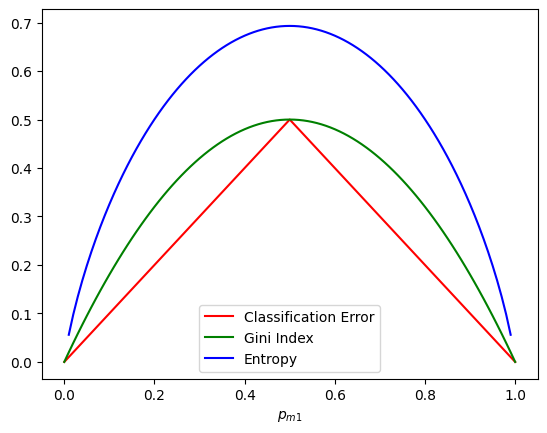

In [ ]:
p_m1 = np.linspace(0,1,101)
p_m2 = 1 - p_m1
E = 1 - np.maximum(p_m1,p_m2)
G = p_m1*(1-p_m1) +  p_m2*(1-p_m2)
D = - p_m1*np.log(p_m1) - p_m2*np.log(p_m2)

plt.plot(p_m1, E, 'r',label='Classification Error')
plt.plot(p_m1, G, 'g',label='Gini Index')
plt.plot(p_m1, D, 'b',label='Entropy')
plt.legend()
plt.xlabel('$p_{m1}$')

In [ ]:
np.mean([0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,0.75])

0.45

# **Q. 8-8**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC ,
DecisionTreeRegressor as DTR ,
plot_tree ,
export_text)
from sklearn.metrics import (accuracy_score ,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ISLP/Carseats.csv')
df = pd.get_dummies(df)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


make sure there's no qualitative variables using get_dummies()

In [ ]:
X = df.iloc[:,1:]
y = df['Sales']
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [ ]:
# This function creates images of tree models using pydot
# Source: http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%208.ipynb
# The original code used pydot instead of pydotplus. We didn't change anything else.
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

(a)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

(b)

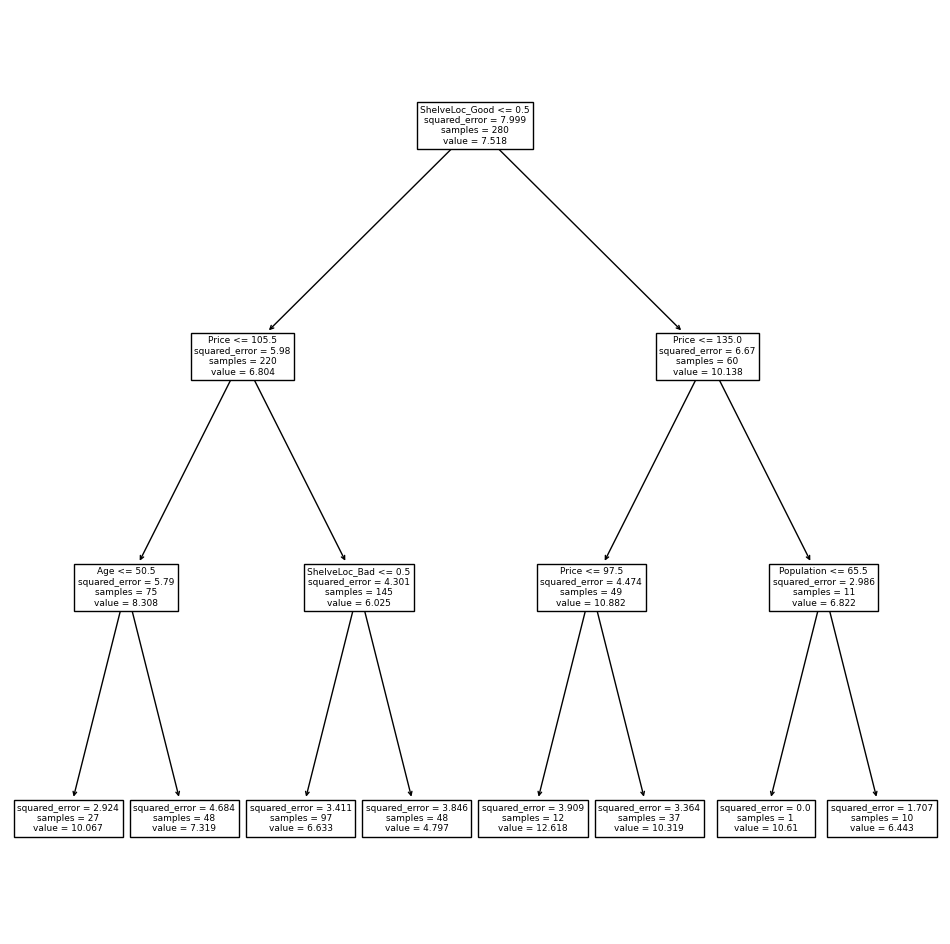

In [ ]:
reg = DTR(max_depth=3)
reg.fit(X_train , y_train)
feature_names = list(X.columns)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg ,
feature_names=feature_names ,
ax=ax);

In [ ]:
# Test MSE
print('Test MSE: ', mean_squared_error(y_test, reg.predict(X_test)))

Test MSE:  4.940009584939633


c)

In [ ]:
ccp_path = reg.cost_complexity_pruning_path(X_train , y_train)
kfold = skm.KFold(5,
shuffle=True ,
random_state =10)
grid = skm.GridSearchCV(reg ,
{'ccp_alpha': ccp_path.ccp_alphas},
refit=True ,
cv=kfold ,
scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [ ]:
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

4.8520887547743445

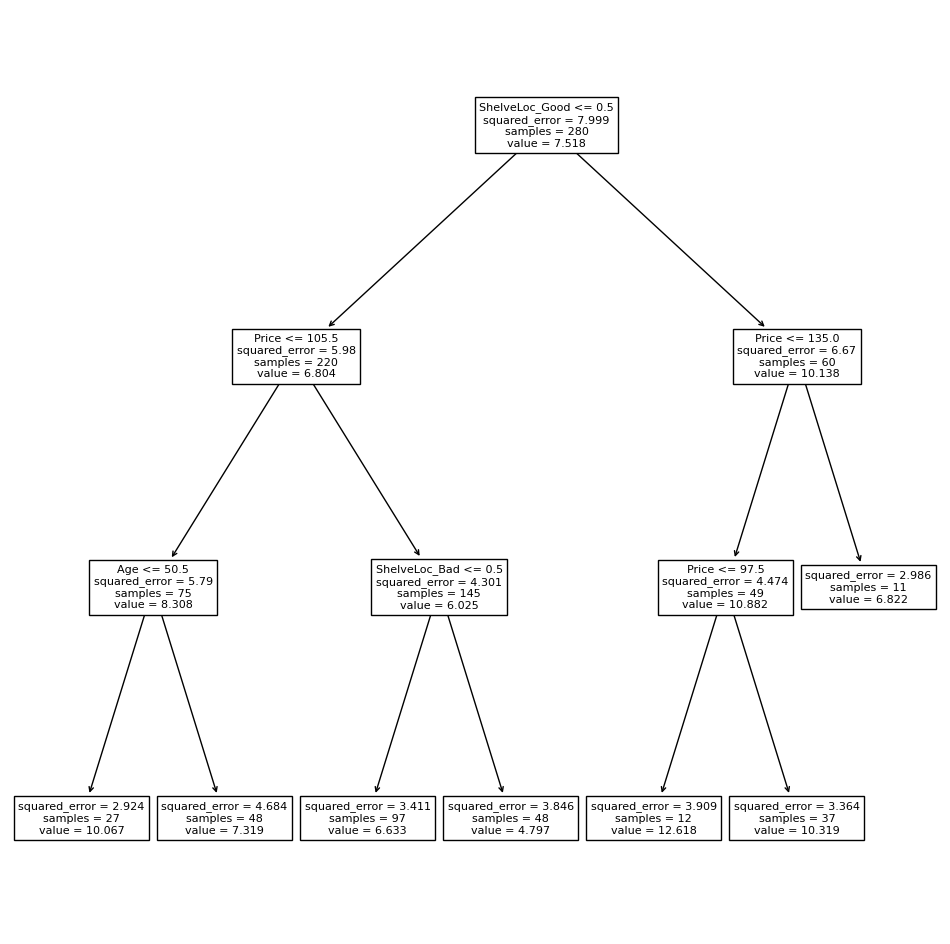

In [ ]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_ ,
feature_names=feature_names ,
ax=ax);

In [ ]:
best_.ccp_alpha

0.05637626298700721

In [ ]:
clf = DecisionTreeRegressor(max_depth=3)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 1.8716327575757692


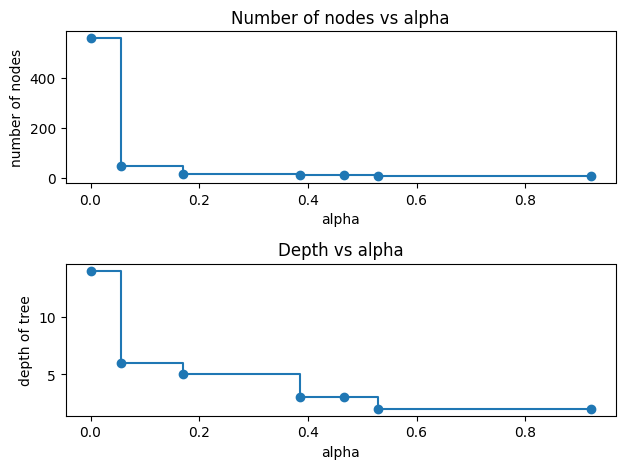

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

c)

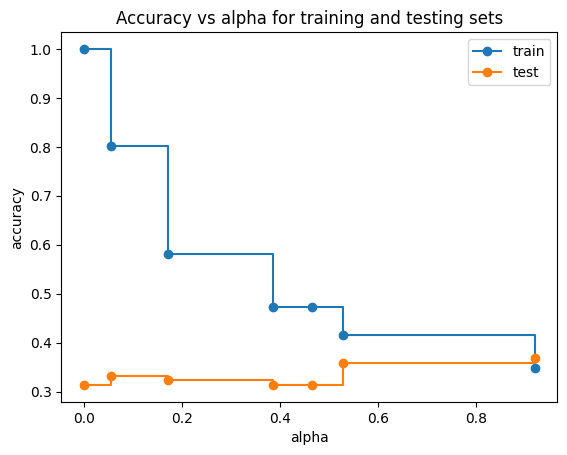

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

d)

In [ ]:
# Fit random forest regressor
Feature_Error = []

rgr = RandomForestRegressor(max_features=None)
rgr.fit(X_train, y_train)
Feature_Error.append(mean_squared_error(y_test, rgr.predict(X_test)))

rgr = RandomForestRegressor(max_features="sqrt")
rgr.fit(X_train, y_train)
Feature_Error.append(mean_squared_error(y_test, rgr.predict(X_test)))

rgr = RandomForestRegressor(max_features="log2")
rgr.fit(X_train, y_train)
Feature_Error.append(mean_squared_error(y_test, rgr.predict(X_test)))

In [ ]:
Feature_Error

[2.813490194749998, 3.160470773083335, 3.213901156916667]

In [ ]:
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
#            verbose=0, warm_start=False)

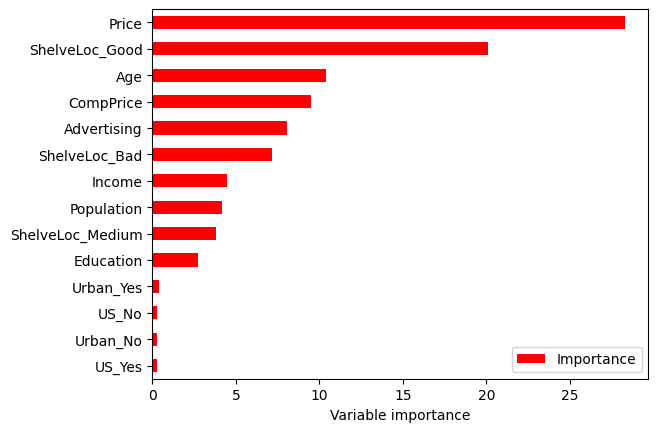

In [ ]:
# Variable importance
rgr = RandomForestRegressor(max_features=None)
rgr.fit(X_train, y_train)
importance = pd.DataFrame({'Importance':rgr.feature_importances_*100}, index=X_train.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

e)

In [ ]:
bart_carseats = BART(random_state=0)
bart_carseats.fit(X_train , y_train)

BART(random_state=0)

In [ ]:
yhat_test = bart_carseats.predict(X_test.astype(np.float32).values)
np.mean((y_test - yhat_test)**2)

1.6152553699613175

In [ ]:
var_inclusion = pd.Series(bart_carseats.variable_inclusion_.mean(0),
index=X.columns)
var_inclusion

CompPrice           22.066667
Income              17.333333
Advertising         19.800000
Population          19.266667
Price               28.933333
Age                 21.066667
Education           18.466667
ShelveLoc_Bad       24.800000
ShelveLoc_Good      23.733333
ShelveLoc_Medium    24.266667
Urban_No            20.066667
Urban_Yes           19.933333
US_No               20.733333
US_Yes              19.400000
dtype: float64

# **Q. 8-11**

a)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ISLP/Caravan.csv')
df = pd.get_dummies(df)
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase_No,Purchase_Yes
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,1,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,1,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,1,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,1,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_train = df.iloc[0:1000,:]
X_test = df.iloc[1000:,:]
X_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase_No,Purchase_Yes
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,1,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,1,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,1,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,1,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_test.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase_No,Purchase_Yes
1000,40,1,5,3,10,1,1,5,3,9,...,0,0,1,0,0,0,0,0,1,0
1001,26,1,1,5,6,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,1
1002,10,1,4,2,3,2,6,0,3,6,...,0,0,0,0,0,0,0,0,1,0
1003,38,1,2,2,9,0,4,2,4,7,...,0,0,0,0,0,0,0,0,1,0
1004,39,2,3,3,9,1,5,0,3,7,...,0,0,0,0,0,0,0,0,1,0


b)

In [ ]:
y_train = X_train['Purchase_Yes']
y_test = X_test['Purchase_Yes']
X_train_new = X_train.iloc[:,:-2]
X_test_new = X_test.iloc[:,:-2]

In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [ ]:
params = {
    "n_estimators": 1000,  ## 1000 trees
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01, ## shrinkage = 0.01
    "loss": "squared_error",
}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_new, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test_new))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(X_test_new)

The mean squared error (MSE) on test set: 0.0615


(array([9.100e+01, 3.628e+03, 7.950e+02, 1.640e+02, 8.300e+01, 2.400e+01,
        2.000e+01, 1.500e+01, 0.000e+00, 2.000e+00]),
 array([-0.1761766 , -0.04457049,  0.08703562,  0.21864173,  0.35024784,
         0.48185395,  0.61346006,  0.74506617,  0.87667229,  1.0082784 ,
         1.13988451]),
 <BarContainer object of 10 artists>)

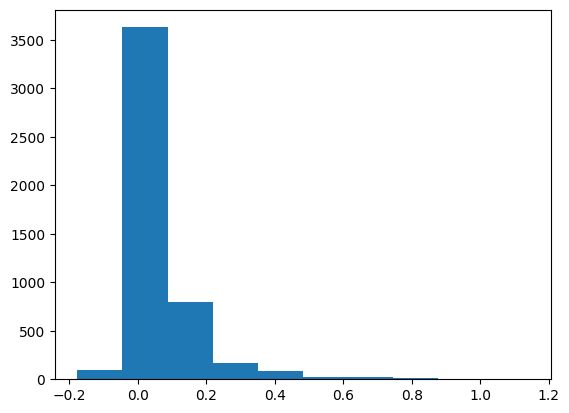

In [ ]:
plt.hist(y_pred)

In [ ]:
count=0
y_pred_bst = []

for p in y_pred:
  if p >= 0.2:
    count += 1
    y_pred_bst.append(1)
  else:
    y_pred_bst.append(0)

prob = count/len(y_pred)
print(prob)

0.07341352136043136


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred_bst)

array([[4224,  309],
       [ 244,   45]])

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_lin = reg = LinearRegression().fit(X_train_new, y_train)
y_pred_lin = reg_lin.predict(X_test_new)

count=0
y_pred_list = []

for p in y_pred_lin:
  if p >= 0.2:
    count += 1
    y_pred_list.append(1)
  else:
    y_pred_list.append(0)

prob_lin = count/len(y_pred_list)
print(prob_lin)

0.03359601824968893


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train_new, y_train)
y_pred_knn = knr.predict(X_test_new)

count=0
y_pred_list = []

for p in y_pred_knn:
  if p >= 0.2:
    count += 1
    y_pred_list.append(1)
  else:
    y_pred_list.append(0)

prob_knn = count/len(y_pred_list)
print(prob_knn)

0.2648278722521775


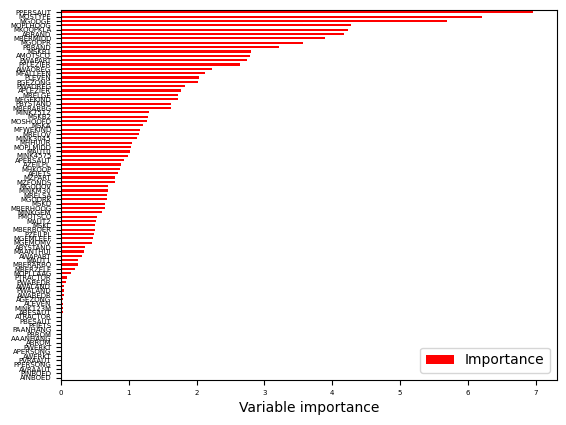

In [ ]:
importance = pd.DataFrame({'Importance':reg.feature_importances_*100}, index=X_train_new.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',fontsize=5)
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

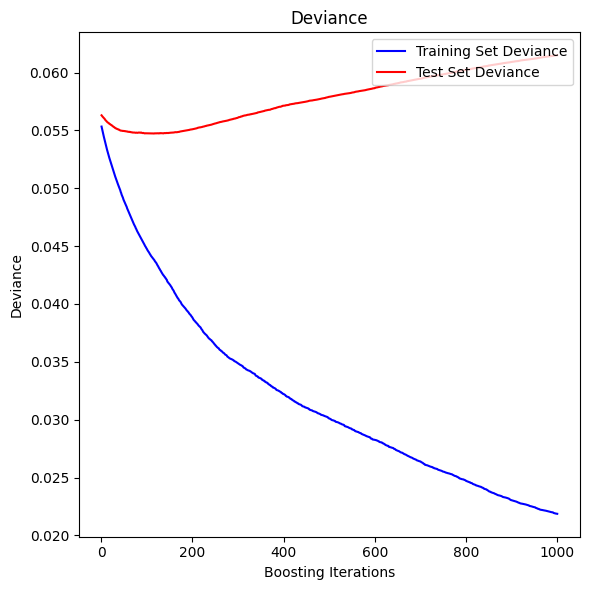

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test_new)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

# **Q. 11-5**

Text(0, 0.5, '$\\hat{S}(t)$')

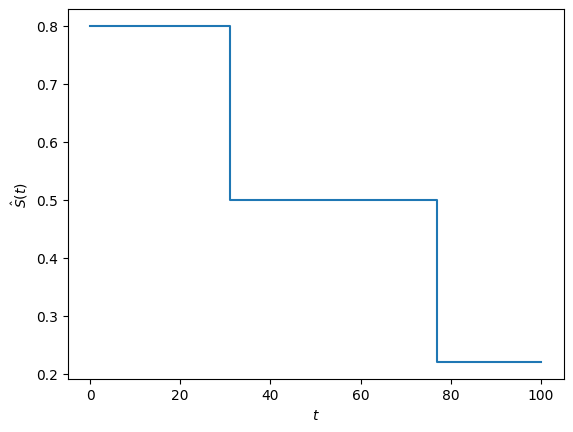

In [ ]:
t = [0,31,77,100]
S_t = [0.8,0.8,0.5,0.22]
plt.step(t,S_t)
plt.xlabel('$t$')
plt.ylabel('$\hat{S}(t)$')

## **Q. 11-11**

a)

In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 34.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a504b69c75f94596a1da1630230059be99c6938a967e70bd02f71465daa168bc
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Un

In [ ]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
from ISLP.models import ModelSpec as MS
from ISLP import load_data

from lifelines import \
(KaplanMeierFitter ,
CoxPHFitter)
from lifelines.statistics import \
(logrank_test ,
multivariate_logrank_test)
from ISLP.survival import sim_time

In [ ]:
df = pd.DataFrame({'time':[26.5,37.2,57.3,90.8,20.2,89.8],'status':[1,1,1,0,0,0],'X':[0.1,11,-0.3,2.8,1.8,0.4]})

In [ ]:
df

,time,status,X
0,26.5,1,0.1
1,37.2,1,11.0
2,57.3,1,-0.3
3,90.8,0,2.8
4,20.2,0,1.8
5,89.8,0,0.4


In [ ]:
G1 = df[df['X']<2]
G2 = df[df['X']>=2]

<Axes: xlabel='timeline'>

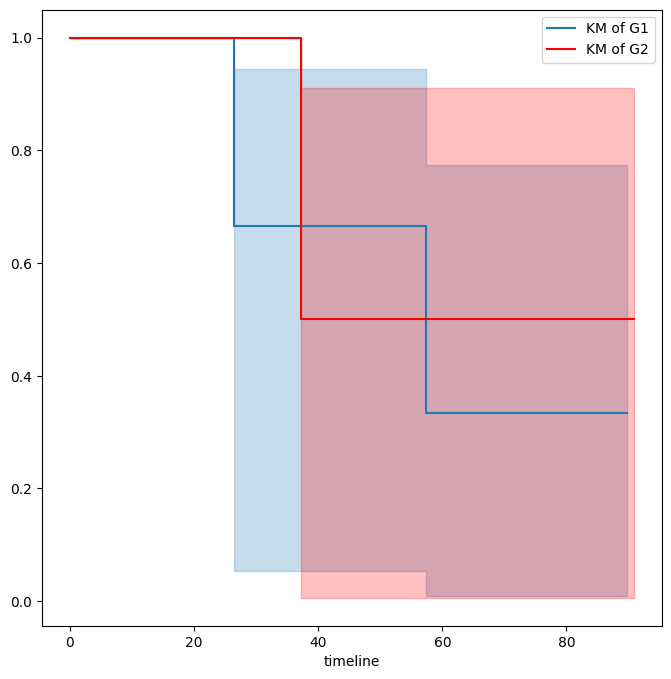

In [ ]:
fig , ax = subplots(figsize=(8,8))
km = KaplanMeierFitter()
km_G1 = km.fit(G1['time'], G1['status'])
km_G1.plot(label='KM of G1', ax=ax)
km_G2 = km.fit(G2['time'], G2['status'])
km_G2.plot(label='KM of G2', ax=ax, color='r')

b)

In [ ]:
G1

,time,status,X
0,26.5,1,0.1
2,57.3,1,-0.3
4,20.2,0,1.8
5,89.8,0,0.4


In [ ]:
G2

,time,status,X
1,37.2,1,11.0
3,90.8,0,2.8


In [ ]:
df

,time,status,X
0,26.5,1,0.1
1,37.2,1,11.0
2,57.3,1,-0.3
3,90.8,0,2.8
4,20.2,0,1.8
5,89.8,0,0.4


In [ ]:
df['grp_ind']=[1,2,1,2,1,1]

In [ ]:
df

,time,status,X,grp_ind
0,26.5,1,0.1,1
1,37.2,1,11.0,2
2,57.3,1,-0.3,1
3,90.8,0,2.8,2
4,20.2,0,1.8,1
5,89.8,0,0.4,1


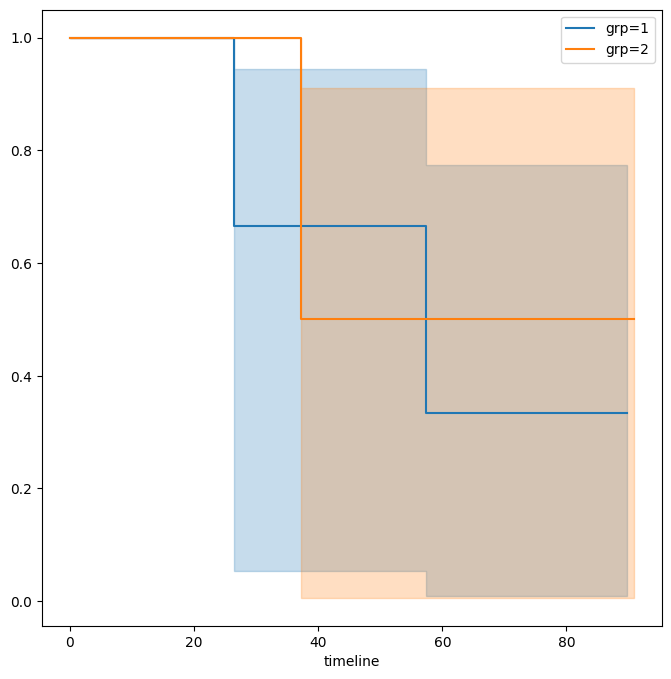

In [ ]:
fig , ax = subplots(figsize=(8,8))
by_grp = {}
for grp , dtfr in df.groupby('grp_ind'):
  by_grp[grp] = dtfr
  km_grp = km.fit(dtfr['time'], dtfr['status'])
  km_grp.plot(label='grp=%s' % grp, ax=ax)

In [ ]:
by_grp

{1:    time  status    X  grp_ind
 0  26.5       1  0.1        1
 2  57.3       1 -0.3        1
 4  20.2       0  1.8        1
 5  89.8       0  0.4        1,
 2:    time  status     X  grp_ind
 1  37.2       1  11.0        2
 3  90.8       0   2.8        2}

In [ ]:
coxph = CoxPHFitter # shorthand
model_df = MS(['time', 'status', 'grp_ind'],intercept=False).fit_transform(df)
cox_fit = coxph().fit(model_df,'time','status')
cox_fit.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
grp_ind,-0.340143,1.235876,0.783144


In [ ]:
cox_fit.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 1
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.36

In [ ]:
logrank_test(by_grp[1]['time'],by_grp[2]['time'],by_grp[1]['status'],by_grp[2]['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

In [ ]:
logrank_test(G2['time'],G1['time'],G2['status'],G1['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35